In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def sensitivity(data, z_lim, z_ticks, mean, std):
    '''  
    生成超参数敏感性分析 3D 柱状图，展示两个超参数的不同组合对模型 FWT (%) 指标的影响
    
    参数：
    data: 二维数组，形状为 (len(mean), len(std))，每个元素代表对应超参数组合下的 FWT (%) 值。
    z_lim:元组/列表，包含两个数值，分别为 Z 轴的最小值和最大值。
    z_ticks:列表/数组,Z 轴刻度的具体位置。
    mean:一维数组，代表 X-Y 平面中 Y 轴的超参数取值，长度为data的行数。
    std:一维数组，代表 X-Y 平面中 X 轴的超参数取值，长度为data的列数。

    配色：
    colors = sns.color_palette('coolwarm', len(std))
    从冷色到暖色的连续渐变调色
    '''

    fig, ax = plt.subplots(1, 1, figsize=(4, 4), subplot_kw={'projection': '3d'})

    data = data.T
    y, x = np.meshgrid(np.arange(len(mean)), np.arange(len(std)))
    dx = dy = 0.8

    colors = sns.color_palette('coolwarm', len(std))
    ax.view_init(elev=30, azim=45)
    ax.grid(True, linestyle='--', alpha=0.5, zorder=0)

    for i in range(len(std)):
        for j in range(len(mean)):
            ax.bar3d(x[i, j], y[i, j], z_lim[0], dx, dy, data[i, j] - z_lim[0], color=colors[i], alpha=0.7, zorder=10)

    ax.set_xticks(np.arange(len(std)))
    ax.set_yticks(np.arange(len(mean)))
    ax.set_xticklabels(std)
    ax.set_yticklabels(mean)
    ax.set_xlabel('$\sigma_t$', fontsize=14)
    ax.set_ylabel('$\mu_t$', fontsize=14)
    ax.set_zlabel('FWT(%)', rotation=90)
    ax.set_zlim(z_lim)
    ax.set_zticks(z_ticks)

    fig.savefig('create_3d_bar.pdf', bbox_inches='tight', pad_inches=0.05)

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\86198\AppData\Local\Temp\ipykernel_16564\2003793821.py:35: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('$\sigma_t$', fontsize=14)
C:\Users\86198\AppData\Local\Temp\ipykernel_16564\2003793821.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mu_t$', fontsize=14)


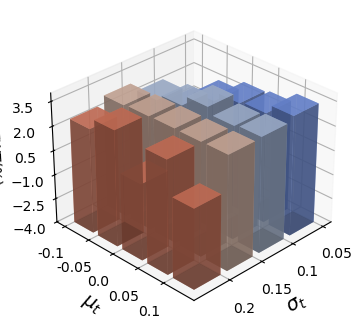

In [14]:
# 示例1：
mean = np.array([-0.1, -0.05, 0, 0.05, 0.1])
std = np.array([0.05, 0.1, 0.15, 0.2])

fwt_cifar100_10 = np.array([
    [0.91, 2.32, 2.94, 2.44],
    [2.08, 2.73, 3.01, 3.13],
    [2.67, 3.38, 3.04, 0.70],
    [2.80, 2.99, 3.02, 2.97],
    [3.38, 3.10, 3.04, 0.92]
])

sensitivity(fwt_cifar100_10, (-4, 4), np.arange(-4, 4, 1.5), mean, std)

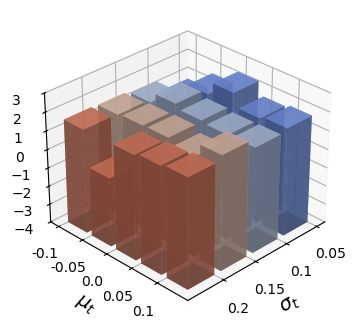

In [10]:
#示例2：
mean = np.array([-0.1, -0.05, 0, 0.05, 0.1])
std = np.array([0.05, 0.1, 0.15, 0.2])

fwt_cifar100_20 = np.array([
    [0.78, 1.41, 1.57, 1.61],
    [1.69, 1.98, 1.65, -0.29],
    [2.39, 1.75, 1.68, 1.64],
    [1.68, 1.65, 1.38, 1.79],
    [1.82, 1.66, 2.14, 1.90]
])
create_3d_bar(fwt_cifar100_20, (-4, 3), np.arange(-4, 3.1, 1), mean, std)

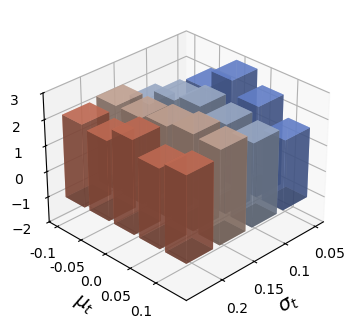

In [12]:
# 示例3：
mean = np.array([-0.1, -0.05, 0, 0.05, 0.1])
std = np.array([0.05, 0.1, 0.15, 0.2])

fwt_tinyimagenet_10 = np.array([
    [-0.43, 1.78, 2.31, 2.19],
    [2.28, 2.39, 2.31, 2.06],
    [3.02, 2.62, 2.47, 2.58],
    [2.49, 2.41, 2.66, 2.03],
    [1.70, 2.20, 2.58, 2.29]
])
create_3d_bar(fwt_tinyimagenet_10, (-1, 3), np.arange(-2, 3.1, 1), mean, std)

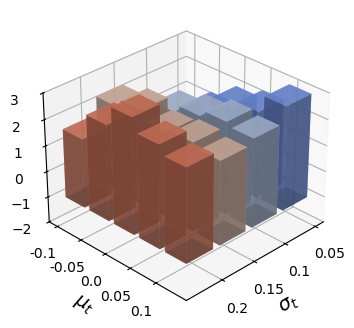

In [13]:
# 示例4：
mean = np.array([-0.1, -0.05, 0, 0.05, 0.1])
std = np.array([0.05, 0.1, 0.15, 0.2])

fwt_tinyimagenet_20 = np.array([
    [-0.70, 0.99, 2.30, 1.64],
    [1.34, 1.97, 2.61, 2.65],
    [2.01, 2.27, 2.26, 3.40],
    [2.30, 2.52, 2.36, 2.90],
    [2.97, 2.38, 2.18, 2.57]
])
create_3d_bar(fwt_tinyimagenet_20, (-1, 3), np.arange(-2, 3.1, 1), mean, std)